Keyword
---
 - Data Preprocessing
  - Load Excel
  - Split Season
  - Remove Outlier (X)
  - Scaler
       - STANDARD
       - MIN
       - MAX
       - ROBUST
 
 - Dimensionality Reduction
  - PCA(Principal Component Analysis)
  - Scatter Plot
 - KMeans-Clustering
 - Visualization
  - ClusterMap
   - Each Based
   - Distribution Based
  - Cluster Scatter
   - Cluter === Label PCA
  - Input New Houself
   - Data Preprocessing
   - Dimesinality Reduction
   - KMeans-Clustering
   - Cluster Sctter In
   - Cluster Near by new Houself Cluster
   - Line Plot Test
   - raw data Distribution Graph
   - processing Data Distribution Graph

In [1]:
import numpy as np
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, MaxAbsScaler, Normalizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN

import matplotlib.pyplot as plt

import seaborn as sns

import pandas as pd
from datetime import datetime, timedelta

import seaborn as sns

from matplotlib import rcParams
from sklearn.linear_model import LinearRegression

from collections import Counter

sns.set(rc={'figure.figsize': (15.7, 13.27)})
rcParams['figure.figsize'] = 15.7,13.27
plt.rcParams['font.family'] = 'AppleGothic'

# Data Preprocessing
---

패턴인식 기본 프로세스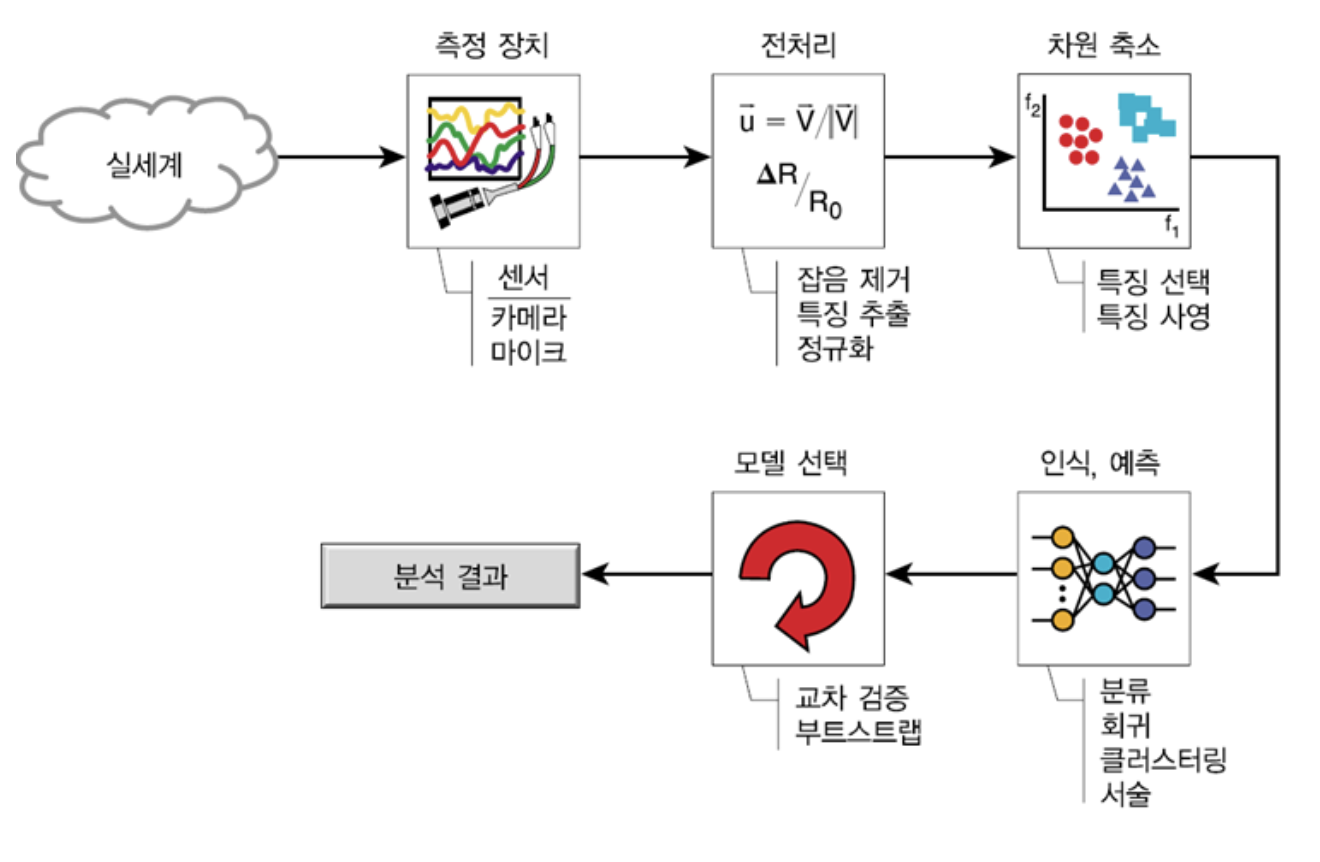

LoadExcel
--

In [2]:
xlsx = pd.read_excel('datas.xlsx', 
                    header = None, 
                    skiprows = 2,
                    engine = 'openpyxl')

data_startcol = 7
ogDatasObj = {}
for col in xlsx:
    if col >= data_startcol: # startcol 7
        ogDatasObj[f'{xlsx[col][0]}-{xlsx[col][1]}-{xlsx[col][2]}'] = xlsx[col][3:]

ogDatas = pd.DataFrame(ogDatasObj)
ogDatas = ogDatas.fillna(0)
ogDatas = ogDatas.reset_index()
del ogDatas['index']

pd.set_option('display.max_row', 20)
pd.set_option('display.max_columns', 100)

ogDatas

아파트1-104-1206  아파트1-104-303  아파트1-104-1307  아파트1-104-1208  \
0              0.085         0.016          0.052          0.003   
1              0.086         0.049          0.053          0.002   
2              0.085         0.013          0.073          0.002   
3              0.085         0.043          0.067          0.002   
4              0.084         0.033          0.051          0.003   
...              ...           ...            ...            ...   
35035          0.007         0.027          0.011          0.066   
35036          0.006         0.022          0.014          0.063   
35037          0.015         0.024          0.009          0.062   
35038          0.023         0.023          0.016          0.063   
35039          0.014         0.033          0.009          0.053   

       아파트1-104-408  아파트1-104-203  아파트1-103-1402  아파트1-103-402  아파트1-103-1201  \
0             0.032         0.074          0.053         0.096          0.105   
1             0.022         0.014          0.048         0.090          0.108   
2             0.016         0.051          0.029         0.033          0.097   
3             0.015         0.015          0.031         0.092          0.048   
4             0.022         0.052          0.052         0.030          0.041   
...             ...           ...            ...           ...            ...   
35035         0.014         0.066          0.066         0.080          0.016   
35036         0.030         0.061          0.063         0.215          0.033   
35037         0.030         0.064          0.060         0.164          0.051   
35038         0.029         0.063          0.038         0.132          0.046   
35039         0.025         0.060          0.049         0.187          0.044   

       아파트1-103-801  아파트1-103-502  아파트1-103-1602  아파트1-103-301  아파트1-103-1502  \
0             0.042         0.149          0.039         0.054          0.132   
1             0.022         0.119          0.023         0.075          0.142   
2             0.046         0.116          0.018         0.071          0.096   
3             0.067         0.102          0.031         0.128          0.082   
4             0.045         0.102          0.032         0.122          0.069   
...             ...           ...            ...           ...            ...   
35035         0.058         0.076          0.101         0.128          0.218   
35036         0.033         0.095          0.075         0.140          0.188   
35037         0.035         0.098          0.058         0.128          0.213   
35038         0.081         0.079          0.071         0.118          0.219   
35039         0.070         0.089          0.082         0.125          0.213   

       아파트1-103-202  아파트1-102-903  아파트1-102-603  아파트1-102-203  아파트1-102-704  \
0             0.091         0.169         0.051         0.118         0.060   
1             0.063         0.183         0.045         0.164         0.065   
2             0.159         0.122         0.043         0.141         0.097   
3             0.104         0.141         0.031         0.103         0.075   
4             0.089         0.103         0.011         0.094         0.084   
...             ...           ...           ...           ...           ...   
35035         0.123         0.154         0.094         0.069         0.099   
35036         0.091         0.176         0.221         0.088         0.105   
35037         0.151         0.190         0.066         0.070         0.076   
35038         0.144         0.170         0.095         0.096         0.060   
35039         0.113         0.234         0.119         0.077         0.071   

       아파트1-102-703  아파트1-102-403  아파트1-102-303  아파트1-101-604  아파트1-101-1602  \
0             0.047         0.047         0.053         0.046          0.104   
1             0.066         0.043         0.056         0.045          0.130   
2             0.064         0.055         0.054        

In [3]:
ogDatas.replace('-', 0, inplace=True)
uids = ogDatas.columns

uids

Index(['아파트1-104-1206', '아파트1-104-303', '아파트1-104-1307', '아파트1-104-1208',
       '아파트1-104-408', '아파트1-104-203', '아파트1-103-1402', '아파트1-103-402',
       '아파트1-103-1201', '아파트1-103-801',
       ...
       '아파트4-105-102', '아파트4-103-1102', '아파트4-105-601', '아파트4-104-1501',
       '아파트4-103-702', '아파트4-102-104', '아파트4-103-902', '아파트4-101-602',
       '아파트4-103-905', '아파트4-101-104'],
      dtype='object', length=398)

Split Season
---

In [5]:
SEASONS = {
    "봄" : ["03", "04", "05"],
    "여름" : ["06", "07", "08"],
    "가을" : ["09", "10", "11"],
    "겨울" : ["12", "01", "02"]
}

SEASONSARR = ['봄','여름','가을','겨울']

'''
 0 : 봄
 1 : 여름
 2 : 가을
 3 : 겨울
'''

'\n 0 : 봄\n 1 : 여름\n 2 : 가을\n 3 : 겨울\n'

Remove Outlier
---
### 이상치 제거
- 이상치 (Outlier)란, 관측된 데이터의 범위에서 많이 벗어난 아주 작은 값이나 아주 큰 값을 말한다.
- 어떤 의사결정을 하는데 필요한 데이터를 분석할 경우, 이렇게 이상한 값들에 의해서 의사결정에 영향을 미칠 수 있으므로, 제거하는 것이 좋다.
- 아웃라이어 제거는 보통 본격적인 데이터 전처리 작업이 들어가기 전에 진행된다.

In [11]:
# 예제 데이터 준비
startDate = datetime(2018,5,1)
endDate = datetime(2019,5,1)
def datetime_range(start, end, delta):
    current = start
    while current < end:
        yield current
        current += delta
dateIndexArr = [dt.strftime('%Y%m%d') for dt in
                   datetime_range(startDate, endDate, timedelta(days = 1))]
# 아파트4-103-606
searchKeyword = '아파트4-103-606'
tsDatasObj = {}
startIdx = 0;
endIdx = 96;
for date in dateIndexArr:
    tsDatasObj[date] = ogDatas[searchKeyword][startIdx:endIdx].values.tolist()
    startIdx = endIdx
    endIdx = endIdx + 96

tsDatas = pd.DataFrame(tsDatasObj)
tsDatas = tsDatas.T
tsDatas = tsDatas.reset_index()
tsDatas.rename(columns={'index':'date'}, inplace=True)
tsDatas['year'] = [dt[0:4] for dt in tsDatas['date']]
tsDatas['month'] = [dt[4:6] for dt in tsDatas['date']]
tsDatas['day'] = [dt[6:8] for dt in tsDatas['date']]
tsDatas['date'] = [datetime.strptime(dt, "%Y%m%d") for dt in tsDatas['date']]
tsDatas.reindex(columns=['date', 'year', 'month', 'day'])

datas = [
        tsDatas[(tsDatas['month'].isin(SEASONS[season]))].copy()
        for season in ["봄", "여름", "가을", "겨울"]
    ]

datas[0] # 봄 데이터
datas[1] # 여름 데이터
datas[2] # 가을 데이터
datas[3] # 겨울 데이터

date      0      1      2      3      4      5      6      7      8  \
214 2018-12-01  0.112  0.121  0.116  0.122  0.114  0.108  0.076  0.071  0.073   
215 2018-12-02  0.039  0.036  0.037  0.050  0.055  0.044  0.036  0.038  0.036   
216 2018-12-03  0.148  0.111  0.136  0.053  0.050  0.060  0.031  0.086  0.061   
217 2018-12-04  0.071  0.044  0.061  0.058  0.063  0.069  0.057  0.052  0.048   
218 2018-12-05  0.054  0.062  0.059  0.052  0.059  0.049  0.055  0.056  0.042   
..         ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
299 2019-02-24  0.107  0.107  0.092  0.093  0.096  0.098  0.096  0.078  0.046   
300 2019-02-25  0.078  0.087  0.078  0.066  0.085  0.084  0.080  0.081  0.162   
301 2019-02-26  0.040  0.035  0.035  0.058  0.051  0.038  0.072  0.061  0.036   
302 2019-02-27  0.102  0.095  0.097  0.066  0.085  0.130  0.076  0.067  0.066   
303 2019-02-28  0.143  0.160  0.138  0.144  0.136  0.105  0.078  0.087  0.084   

         9     10     11     12     13     14     15     16     17     18  \
214  0.057  0.100  0.079  0.061  0.076  0.064  0.053  0.066  0.064  0.080   
215  0.034  0.040  0.046  0.040  0.037  0.028  0.048  0.070  0.043  0.045   
216  0.055  0.049  0.044  0.043  0.043  0.057  0.050  0.053  0.048  0.044   
217  0.057  0.051  0.050  0.050  0.050  0.060  0.045  0.044  0.040  0.046   
218  0.042  0.053  0.055  0.049  0.042  0.068  0.089  0.045  0.036  0.047   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
299  0.050  0.046  0.058  0.037  0.049  0.056  0.044  0.057  0.045  0.037   
300  0.108  0.078  0.095  0.077  0.048  0.060  0.073  0.049  0.051  0.037   
301  0.041  0.043  0.038  0.050  0.045  0.031  0.040  0.043  0.051  0.037   
302  0.061  0.061  0.071  0.066  0.053  0.064  0.085  0.064  0.052  0.048   
303  0.075  0.100  0.069  0.076  0.082  0.073  0.082  0.074  0.077  0.088   

        19     20     21     22     23     24     25     26     27     28  \
214  0.066  0.054  0.062  0.064  0.073  0.074  0.096  0.056  0.055  0.058   
215  0.027  0.038  0.039  0.042  0.038  0.035  0.038  0.036  0.035  0.041   
216  0.056  0.045  0.042  0.037  0.059  0.075  0.077  0.043  0.108  0.046   
217  0.062  0.050  0.053  0.048  0.051  0.050  0.039  0.047  0.051  0.056   
218  0.057  0.046  0.046  0.043  0.045  0.050  0.049  0.043  0.042  0.054   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
299  0.059  0.052  0.047  0.048  0.047  0.083  0.058  0.048  0.045  0.035   
300  0.027  0.051  0.047  0.039  0.180  0.156  0.055  0.067  0.034  0.048   
301  0.037  0.035  0.046  0.043  0.061  0.067  0.033  0.039  0.041  0.040   
302  0.052  0.066  0.052  0.048  0.054  0.046  0.058  0.050  0.053  0.052   
303  0.061  0.057  0.055  0.082  0.057  0.050  0.059  0.052  0.048  0.056   

        29     30     31     32     33     34     35     36     37     38  \
214  0.049  0.044  0.032  0.049  0.065  0.048  0.045  0.036  0.058  0.083   
215  0.026  0.049  0.035  0.039  0.060  0.052  0.037  0.035  0.039  0.034   
216  0.035  0.036  0.038  0.040  0.048  0.046  0.037  0.059  0.047  0.087   
217  0.053  0.088  0.111  0.112  0.089  0.087  0.067  0.047  0.049  0.099   
218  0.047  0.039  0.056  0.090  0.087  0.058  0.052  0.038  0.056  0.075   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
299  0.059  0.055  0.053  0.044  0.035  0.060  0.054  0.053  0.086  0.078   
300  0.048  0.050  0.048  0.083  0.068  0.037  0.046  0.069  0.060  0.093   
301  0.035  0.039  0.061  0.045  0.026  0.095  0.229  0.177  0.057  0.079   
302  0.055  0.058  0.045  0.079  0.066  0.056  0.039  0.060  0.075  0.090   
303  0.053  0.050  0.056  0.055  0.050  0.048  0.082  0.066  0.080  0.131   

        39     40     41     42     43     44     45     46     47     48  \
214  0.101  0.127  0.088  0.126  0.120  0.099  0.073  0.062  0.078  0.063   
215  0.032  0.041  0.040  0.045  0.037  0.032  0.061  0.066  0.086  0.058   
216  0.104  0.094  0.039  0.072

<AxesSubplot:xlabel='timeslot', ylabel='data'>

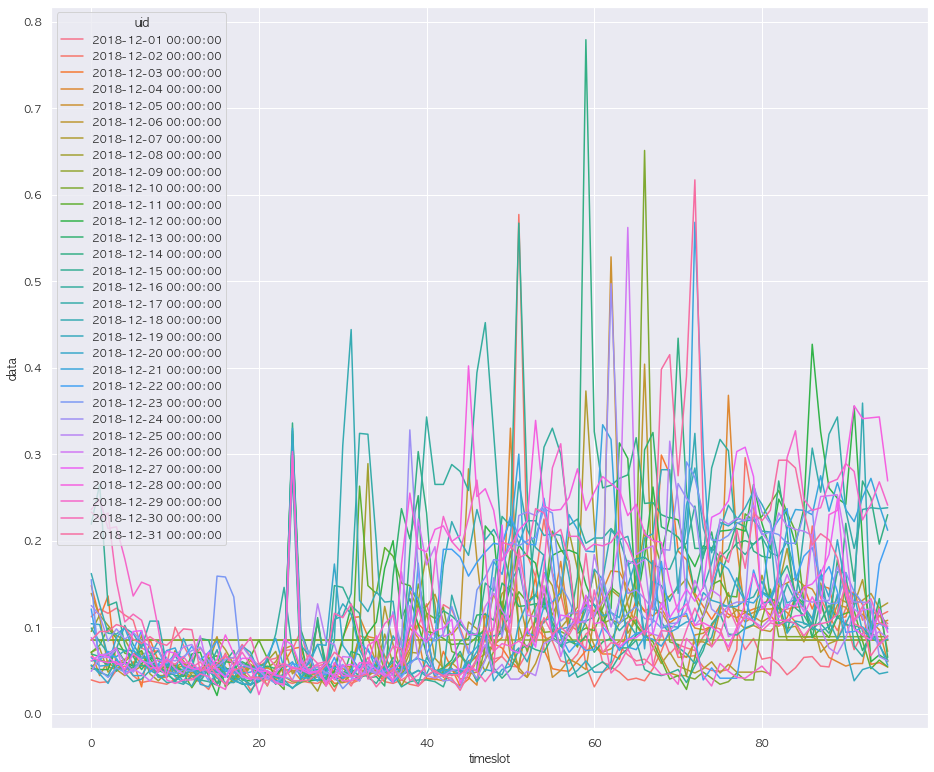

In [38]:
test = datas[3][datas[3].columns.difference(['year', 'month', 'day'])].copy()
test = test[test['date'].dt.month == 12]

test.set_index('date',inplace=True)
test = test.T
plotData = pd.DataFrame()
for uid in test:
    tmp = pd.DataFrame()
    tmp['timeslot'] = range(0,96)
    tmp['data'] = test[uid][0:96]
    tmp['uid'] = uid
    plotData = pd.concat([plotData, tmp], axis=0)
sns.lineplot(data=plotData, x="timeslot", y="data", hue="uid")

In [73]:
remove_outlier = datas[3][datas[3].columns.difference(['year', 'month', 'day'])].copy()
remove_outlier = remove_outlier[remove_outlier['date'].dt.month == 12]
dateBak = remove_outlier['date']
del remove_outlier['date']
remove_outlier

0      1      2      3      4      5      6      7      8      9   \
214  0.112  0.121  0.116  0.122  0.114  0.108  0.076  0.071  0.073  0.057   
215  0.039  0.036  0.037  0.050  0.055  0.044  0.036  0.038  0.036  0.034   
216  0.148  0.111  0.136  0.053  0.050  0.060  0.031  0.086  0.061  0.055   
217  0.071  0.044  0.061  0.058  0.063  0.069  0.057  0.052  0.048  0.057   
218  0.054  0.062  0.059  0.052  0.059  0.049  0.055  0.056  0.042  0.042   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
240  0.061  0.068  0.066  0.057  0.058  0.095  0.096  0.059  0.048  0.072   
241  0.066  0.061  0.059  0.060  0.051  0.069  0.062  0.053  0.053  0.044   
242  0.236  0.248  0.214  0.216  0.179  0.136  0.152  0.148  0.098  0.039   
243  0.233  0.225  0.232  0.153  0.106  0.115  0.108  0.078  0.049  0.062   
244  0.085  0.095  0.095  0.103  0.100  0.086  0.081  0.089  0.082  0.079   

        10     11     12     13     14     15     16     17     18     19  \
214  0.100  0.079  0.061  0.076  0.064  0.053  0.066  0.064  0.080  0.066   
215  0.040  0.046  0.040  0.037  0.028  0.048  0.070  0.043  0.045  0.027   
216  0.049  0.044  0.043  0.043  0.057  0.050  0.053  0.048  0.044  0.056   
217  0.051  0.050  0.050  0.050  0.060  0.045  0.044  0.040  0.046  0.062   
218  0.053  0.055  0.049  0.042  0.068  0.089  0.045  0.036  0.047  0.057   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
240  0.070  0.056  0.052  0.051  0.071  0.050  0.042  0.055  0.064  0.064   
241  0.070  0.059  0.058  0.050  0.051  0.063  0.091  0.069  0.045  0.039   
242  0.035  0.039  0.039  0.046  0.043  0.033  0.028  0.056  0.071  0.056   
243  0.057  0.066  0.053  0.060  0.047  0.058  0.068  0.056  0.075  0.088   
244  0.088  0.098  0.097  0.049  0.057  0.043  0.034  0.050  0.054  0.042   

        20     21     22     23     24     25     26     27     28     29  \
214  0.054  0.062  0.064  0.073  0.074  0.096  0.056  0.055  0.058  0.049   
215  0.038  0.039  0.042  0.038  0.035  0.038  0.036  0.035  0.041  0.026   
216  0.045  0.042  0.037  0.059  0.075  0.077  0.043  0.108  0.046  0.035   
217  0.050  0.053  0.048  0.051  0.050  0.039  0.047  0.051  0.056  0.053   
218  0.046  0.046  0.043  0.045  0.050  0.049  0.043  0.042  0.054  0.047   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
240  0.049  0.049  0.046  0.086  0.079  0.053  0.048  0.049  0.059  0.039   
241  0.053  0.049  0.044  0.042  0.054  0.051  0.046  0.049  0.034  0.059   
242  0.022  0.049  0.035  0.034  0.303  0.059  0.050  0.058  0.032  0.045   
243  0.057  0.066  0.055  0.058  0.052  0.052  0.068  0.058  0.060  0.116   
244  0.042  0.033  0.053  0.055  0.038  0.038  0.039  0.047  0.056  0.071   

        30     31     32     33     34     35     36     37     38     39  \
214  0.044  0.032  0.049  0.065  0.048  0.045  0.036  0.058  0.083  0.101   
215  0.049  0.035  0.039  0.060  0.052  0.037  0.035  0.039  0.034  0.032   
216  0.036  0.038  0.040  0.048  0.046  0.037  0.059  0.047  0.087  0.104   
217  0.088  0.111  0.112  0.089  0.087  0.067  0.047  0.049  0.099  0.088   
218  0.039  0.056  0.090  0.087  0.058  0.052  0.038  0.056  0.075  0.124   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
240  0.055  0.057  0.051  0.060  0.051  0.043  0.048  0.062  0.104  0.091   
241  0.044  0.043  0.059  0.058  0.090  0.057  0.036  0.173  0.255  0.191   
242  0.038  0.038  0.042  0.079  0.085  0.104  0.114  0.056  0.083  0.122   
243  0.111  0.127  0.091  0.040  0.045  0.058  0.078  0.075  0.038  0.045   
244  0.063  0.044  0.043  0.046  0.031  0.042  0.052  0.039  0.045  0.032   

        40     41     42     43     44     45     46     47     48     49  \
214  0.127  0.088  0.126  0.120  0.099  0.073  0.062  0.078  0.063  0.066   
215  0.041  0.040  0.045  0.037  0.032  0.061  0.066  0.086  0.058  0.067   
216  0.094  0.039  0.072  0.052  0.032  0.040  0.063  0.069  0.081  0.076   


In [74]:
outlier_indices = []
for col in remove_outlier:
    Q1 = np.percentile(remove_outlier[col], 25)
    Q3 = np.percentile(remove_outlier[col], 75)
    IQR = Q3 - Q1
    
    outlier_step = 1.5 * IQR
    
    outlier_list_col = remove_outlier[(remove_outlier[col] < Q1 - outlier_step) | 
                          (remove_outlier[col] > Q3 + outlier_step)].index
    outlier_indices.extend(outlier_list_col)

outlier_indices = Counter(outlier_indices)
multiple_outliers = list(k for k, v in outlier_indices.items() if v > 2)

multiple_outliers

[228,
 242,
 243,
 244,
 222,
 223,
 226,
 236,
 224,
 229,
 234,
 227,
 238,
 231,
 230,
 225,
 239,
 241]

In [75]:
remove_outlier.drop(multiple_outliers, inplace=True)
remove_outlier['date'] = dateBak
remove_outlier

remove_outlier.set_index('date',inplace=True)
remove_outlier = remove_outlier.T

plotData = pd.DataFrame()
for uid in remove_outlier:
    tmp = pd.DataFrame()
    tmp['timeslot'] = range(0,96)
    tmp['data'] = remove_outlier[uid][0:96]
    tmp['uid'] = uid
    plotData = pd.concat([plotData, tmp], axis=0)

<AxesSubplot:xlabel='timeslot', ylabel='data'>

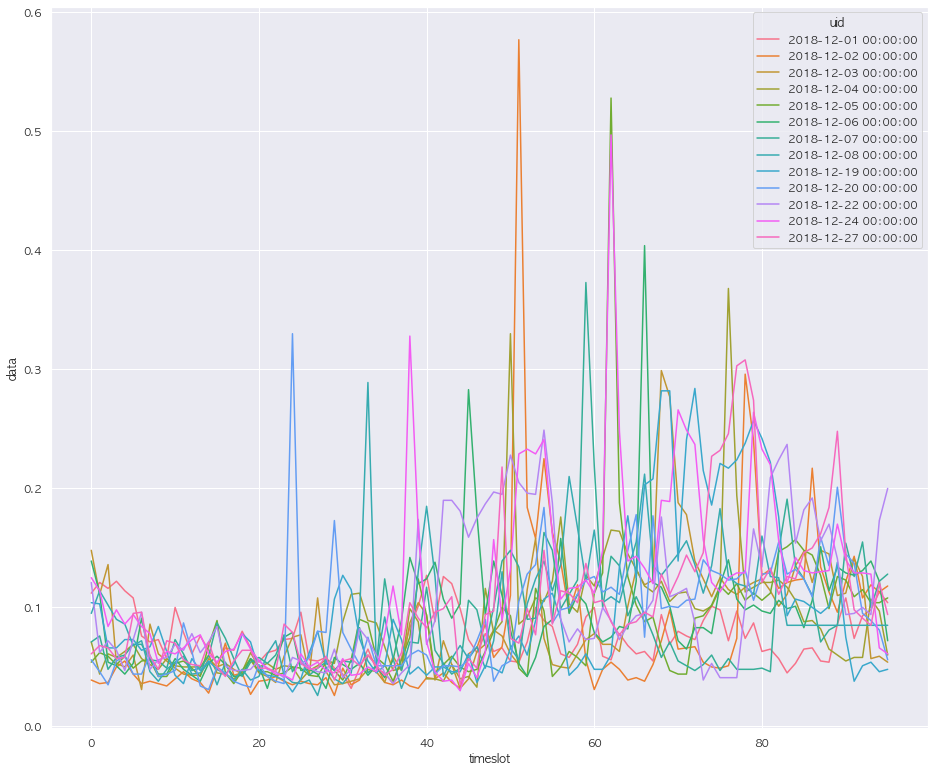

In [76]:
plotData
sns.lineplot(data=plotData, x="timeslot", y="data", hue="uid")

Remove Outlier 한계점
---
- 원래는 1차원 데이터에서 진행이 되지만, 96차원인 timeslot에 적용한 IQR 방식으로는 정확하게 이상치들을 제거할 수 없다. 오히려 정확한 값들이 사라질 확률이 높다
- 그래서 일단은 아웃라이어 제거는 보류 하도록 한다.

In [ ]:
clusters = pd.DataFrame(columns=['uid', 'timeslot', 'season', 'data'])

count = 0;
max_count = 150;

for uid in uids:
    if count >= max_count:
        break;
    startDate = datetime(2018,5,1)
    endDate = datetime(2019,5,1)
    def datetime_range(start, end, delta):
        current = start
        while current < end:
            yield current
            current += delta
    dateIndexArr = [dt.strftime('%Y%m%d') for dt in
                       datetime_range(startDate, endDate, timedelta(days = 1))]
    print(f'{uid} Start')
    searchKeyword_2 = uid
    tsDatasObj = {}
    startIdx = 0;
    endIdx = 96;
    
    # Data Load
    for date in dateIndexArr:
        tsDatasObj[date] = ogDatas[searchKeyword_2][startIdx:endIdx].values.tolist()
        startIdx = endIdx
        endIdx = endIdx + 96

    tsDatas = pd.DataFrame(tsDatasObj)
    tsDatas = tsDatas.T
    tsDatas = tsDatas.reset_index()
    tsDatas.rename(columns={'index':'date'}, inplace=True)
    tsDatas['year'] = [dt[0:4] for dt in tsDatas['date']]
    tsDatas['month'] = [dt[4:6] for dt in tsDatas['date']]
    tsDatas['day'] = [dt[6:8] for dt in tsDatas['date']]
    tsDatas['date'] = [datetime.strptime(dt, "%Y%m%d") for dt in tsDatas['date']]
    tsDatas.reindex(columns=['date', 'year', 'month', 'day'])

    SEASONS = {
        "봄" : ["03", "04", "05"],
        "여름" : ["06", "07", "08"],
        "가을" : ["09", "10", "11"],
        "겨울" : ["12", "01", "02"]
    }

    SEASONSARR = ['봄','여름','가을','겨울']

    '''
     0 : 봄
     1 : 여름
     2 : 가을
     3 : 겨울
    '''

    datas = [
        tsDatas[(tsDatas['month'].isin(SEASONS[season]))].copy()
        for season in ["봄", "여름", "가을", "겨울"]
    ]
    
    # Remove Outlier

    # Data
    # 정규화
    # 5
    for i in range(0,4):
        dpp = datas[i][datas[i].columns.difference(['date', 'year', 'month', 'day'])].copy()
        dpp = dpp

        # Scaler 선택
        # STD, MIN, MAX, ROBUST, NORM
        selScaler = "ROBUST"

        scaler = StandardScaler()
        if selScaler == "STD":
            scaler = StandardScaler()
        elif selScaler == "MIN":
            scaler = MinMaxScaler()
        elif selScaler == "MAX":
            scaler = MaxAbsScaler()
        elif selScaler == "ROBUST":
            scaler = RobustScaler()
        elif selScaler == "NORM":
            scaler = Normalizer()

        dpp = pd.DataFrame(scaler.fit_transform(dpp))

        dpp.index = datas[i]['date']
        dpp

        pca = PCA(n_components=2)

        pca.fit(dpp)
        dr = pd.DataFrame(pca.transform(dpp), columns = ['x','y'])

        dr.index = datas[i]['date']
        dr

        '''
        def elbow(X):
            sse = []
            for i in range(1, 11):
                km = KMeans(n_clusters=i, init='k-means++', random_state=0)
                km.fit(X)
                sse.append(km.inertia_)

            plt.plot(range(1, 11), sse, marker = 'o')
            plt.show()

        elbow(dr)
        '''

        K = 3

        points = dr.values
        kmeans = KMeans(n_clusters=K).fit(points)
        centers = pd.DataFrame(kmeans.cluster_centers_, columns = ['x', 'y'])

        clusterNum = [i for i in range(K)]
        centers['cluster'] = [i for i in range(len(centers))]
        centers['type'] = [f'cluster' for dt in clusterNum]
        centers

        kmeans.labels_

        clustering = dr.copy()
        clustering['cluster'] = kmeans.labels_
        clustering['type'] = ['data' for i in range(len(clustering['x']))]

        result = pd.concat([clustering, centers], axis = 0)

        result

        '''
        sns.scatterplot(x='x', y="y", 
                        hue="cluster", 
                        style="type",
                        palette="muted",
                        s=400,
                        data=result)
        '''
        tsCheck = datas[i][datas[i].columns.difference(['year', 'month', 'day'])].copy()
        tsCheck.reset_index(inplace=True)
        del tsCheck['index']
        tsCheck = tsCheck.set_index('date')
        tsCheck['cluster'] = clustering['cluster']
        tsCheck.reset_index(inplace=True)
        tsCheck.set_index(['cluster', 'date'], inplace=True)
        tsCheck = tsCheck.T
        tsCheck
        '''
        sns.lineplot(data=tsCheck)
        '''

        processingData = [];
        for d in tsCheck:
            for idx,t in enumerate(tsCheck[d]):
                processingData.append({
                    "date": d[1],
                    "timeslot": idx,
                    "cluster": f"cluster-{d[0]}",
                    "data": t
                })
        processingData = pd.DataFrame(processingData)
        processingData

        '''
        sns.lineplot(data=processingData,
                    x="timeslot",
                    y="data",
                    units="date",
                    hue="cluster",
                    estimator=None,
                    lw=0.5)
        '''

        best = pd.DataFrame(processingData.groupby('cluster').size().sort_values(ascending=False)).reset_index()['cluster'][0]
#        print(f'best is {best}')
        cluster = processingData[processingData['cluster'] == best].groupby('timeslot').mean().reset_index()
        cluster['uid'] = searchKeyword_2
        cluster['season'] = SEASONSARR[i]
        cluster

        clusters = pd.concat([clusters, cluster], axis = 0)
        
    count+=1
        
clusterMap = sns.FacetGrid(clusters, col="season",col_wrap=3, height=6)
clusterMap.map(sns.lineplot, "timeslot", "data", "uid", estimator=None, lw=3)